# Braking notebook

In [12]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

tmax = 1000
L = 500
N = 0.13
vmax = 5
p = 0.2
probabilities = list(np.arange(0, 1, 0.2))

# Behaviour of different braking probabilities

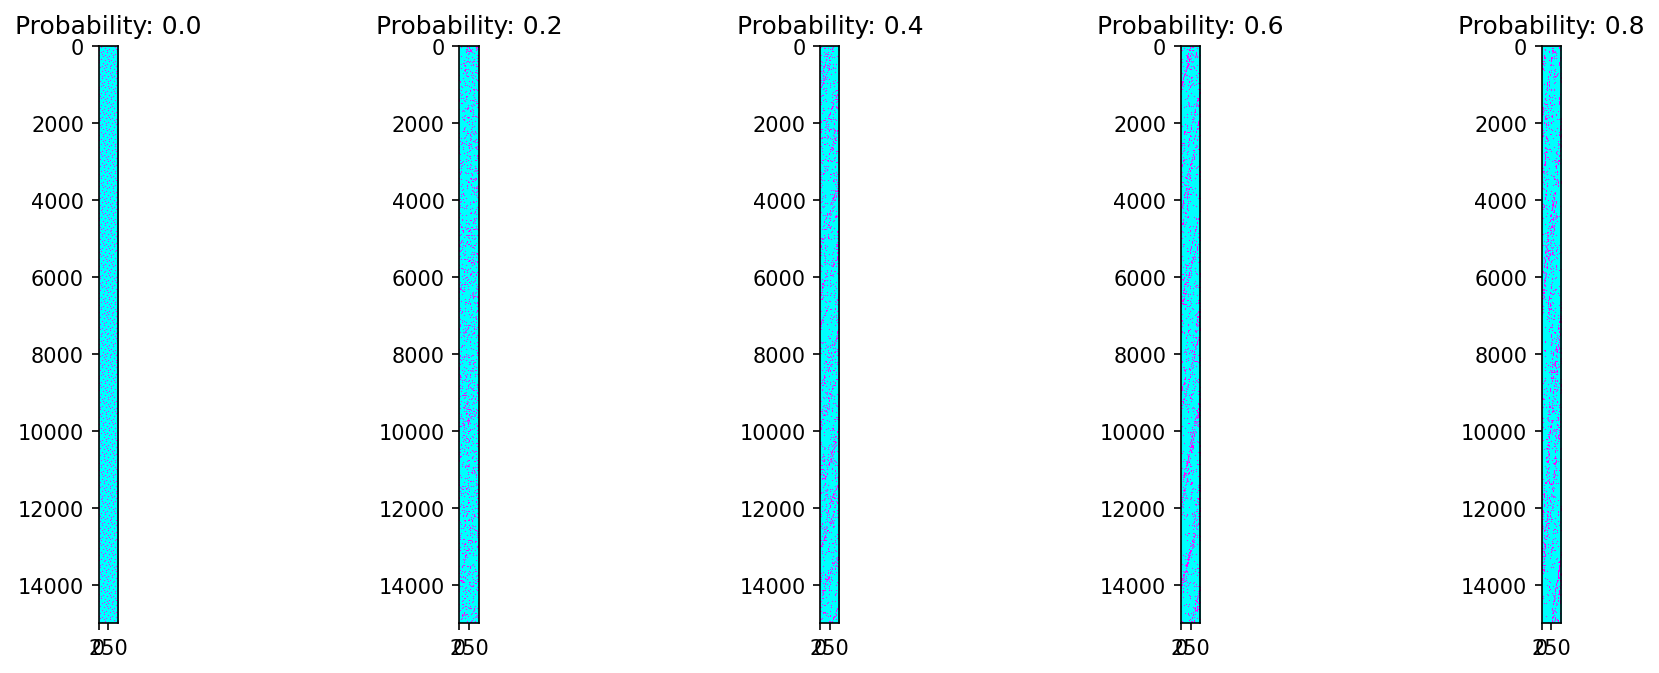

In [13]:
fig, axs = plt.subplots(1,len(probabilities), figsize = (len(probabilities)*3, 5), dpi=150)
for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[probabilities.index(p)].set_title(f'Probability: {round(p,2)}')
    axs[probabilities.index(p)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

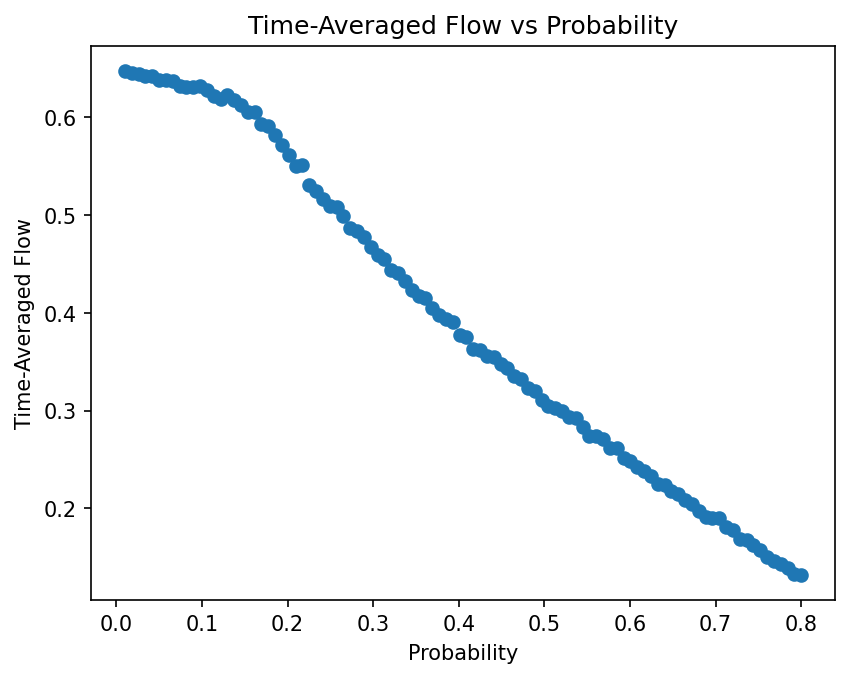

In [14]:
probabilities = np.linspace(0.01, 0.8, 100)

flow_vs_prob = []

for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L,  N, vmax, p, tmax)
    simulation.run_model()
    single_cell_flow = simulation.flow()
    final_single_cell_flow = single_cell_flow/tmax

    flow_vs_prob.append(final_single_cell_flow)

# Plotting
plt.figure(dpi = 150)
plt.scatter(probabilities, flow_vs_prob)
plt.xlabel('Probability')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Probability')
# plt.axvline(x = optimal_density,  color = 'tab:orange', linestyle = '--', label = f'x = {round(optimal_density, 2)}')
# plt.axvline(x = 0.08, color = 'tab:red', linestyle = '-.', label = 'x = 0.08')
# plt.legend()
plt.show()

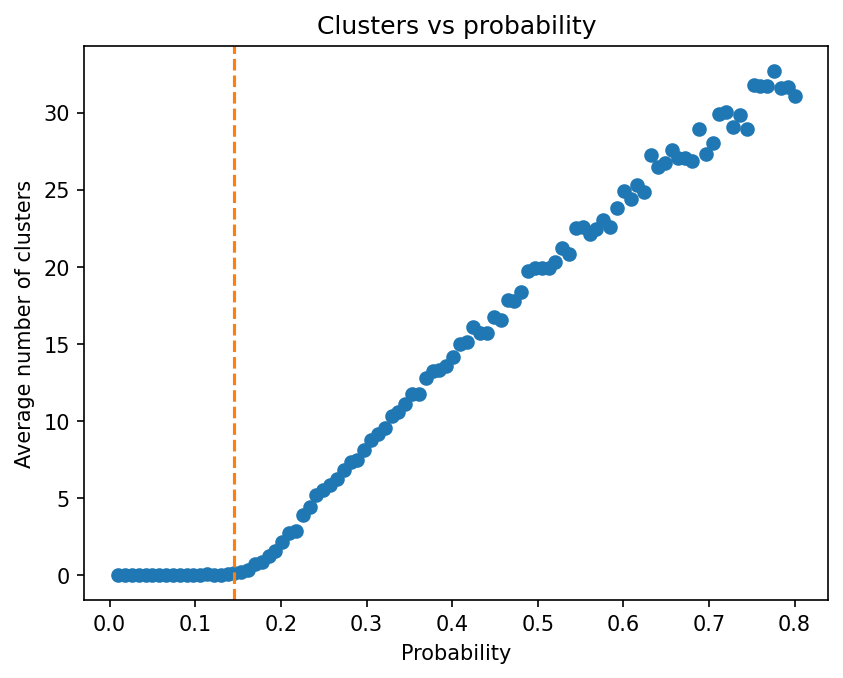

In [17]:
probabilities = np.linspace(0.01, 0.8, 100)

# flow_vs_prob = []
cluster_vs_prob = []

for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L,  N, vmax, p, tmax)
    simulation.run_model()
    # single_cell_flow = simulation.flow()
    clusters = simulation.clusters()[0]
    
    # final_single_cell_flow = single_cell_flow/tmax
    cluster_vs_prob.append(np.mean(clusters))

    # flow_vs_prob.append(final_single_cell_flow)

# for i in range(len(probabilities)):
#     # Calculate the rate of change of velocity for each density
#     rate_of_change = np.diff(cluster_vs_prob, n=2) / np.diff(probabilities, n=2)

#     # Find the indexes where the rate of change starts decreasing
#     optimal_index = np.argmax(rate_of_change < 0)

#     # Find the max velocity that corresponds to this index
#     optimal_probability = probabilities[optimal_index]

# Plotting
plt.figure(dpi = 150)
plt.scatter(probabilities, cluster_vs_prob)
plt.xlabel('Probability')
plt.ylabel('Average number of clusters')
plt.title('Clusters vs probability')
plt.axvline(x = 0.145, color = 'tab:orange', linestyle = '--')
# plt.axvline(x = optimal_probability,  color = 'tab:orange', linestyle = '--', label = f'x = {round(optimal_probability, 2)}')
# plt.axvline(x = 0.08, color = 'tab:red', linestyle = '-.', label = 'x = 0.08')
# plt.legend()
plt.show()

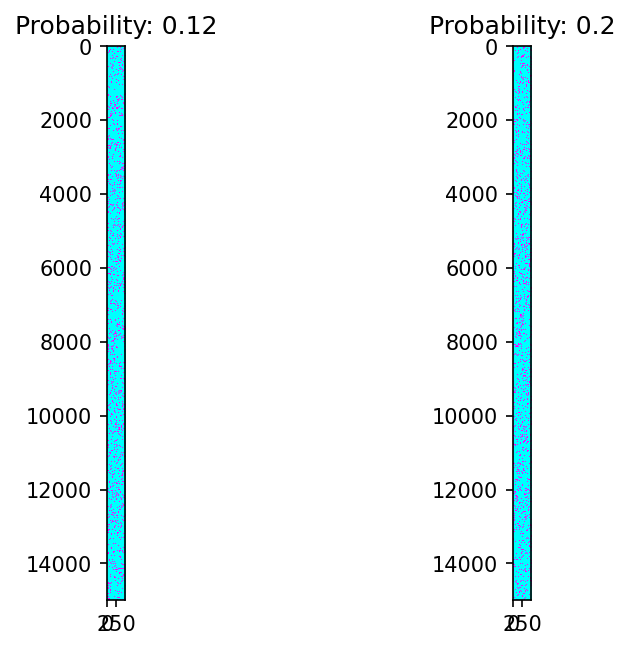

In [16]:
fig, axs = plt.subplots(1, 2, dpi=150)

probabilities = [0.12, 0.2]

for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[probabilities.index(p)].imshow(points, cmap = "cool", interpolation = "nearest")
    axs[probabilities.index(p)].set_title(f'Probability: {p}')
plt.show()

# Cluster distributions

In [12]:
# plt.figure(figsize=(10,10), dpi=150)

# for p in probabilities:
#     simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
#     simulation.run_model()
#     clusters = simulation.clusters()[0]
#     plt.plot(range(tmax), clusters, label = f'Probability: {p:.2f}', alpha = 0.7)
#     plt.xlabel('Time-steps')
#     plt.ylabel('Number of cells in clusters')
#     plt.title('Cluster Distribution')
#     plt.legend()

# plt.show()

# Average cells in cluster vs braking probability

In [6]:
'''
Not being used for presentation
'''

# probs = np.linspace(0.01, 0.9, 1000)

# cluster_averages = []

# for p in probs:
#     simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
#     simulation.run_model()
#     cluster_list = simulation.clusters()[0]
#     cluster_average = np.mean(cluster_list)
#     cluster_averages.append(cluster_average)

# # Plotting
# plt.plot(probs, cluster_averages)
# plt.xlabel('Probability of braking')
# plt.ylabel('Average number of cells in clusters')
# plt.title('Average cells in cluster vs braking probability')
# plt.show()

'\nNot being used for presentation\n'

# Varied maximum braking

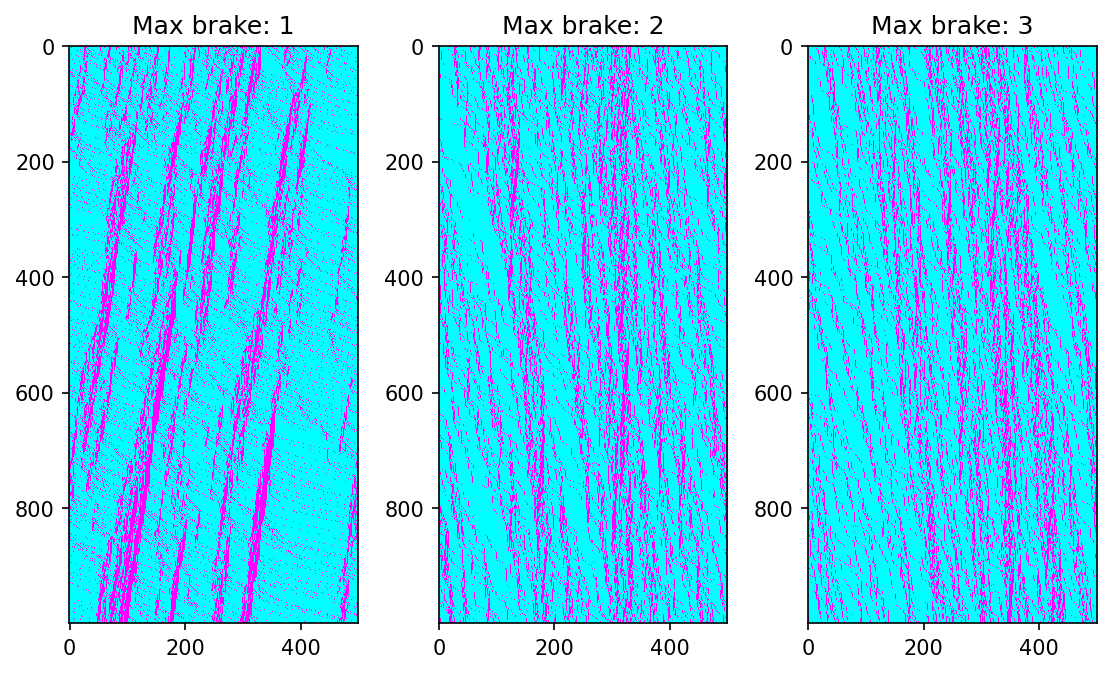

In [4]:
max_brake_values = [1,2,3]

fig, axs = plt.subplots(1,len(max_brake_values), figsize = (len(max_brake_values)*3, 5), dpi = 150)

for brake in max_brake_values:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_brake = brake)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[max_brake_values.index(brake)].imshow(points, cmap = "cool", interpolation = "nearest")
    axs[max_brake_values.index(brake)].set_title(f'Max brake: {brake}')

plt.show()

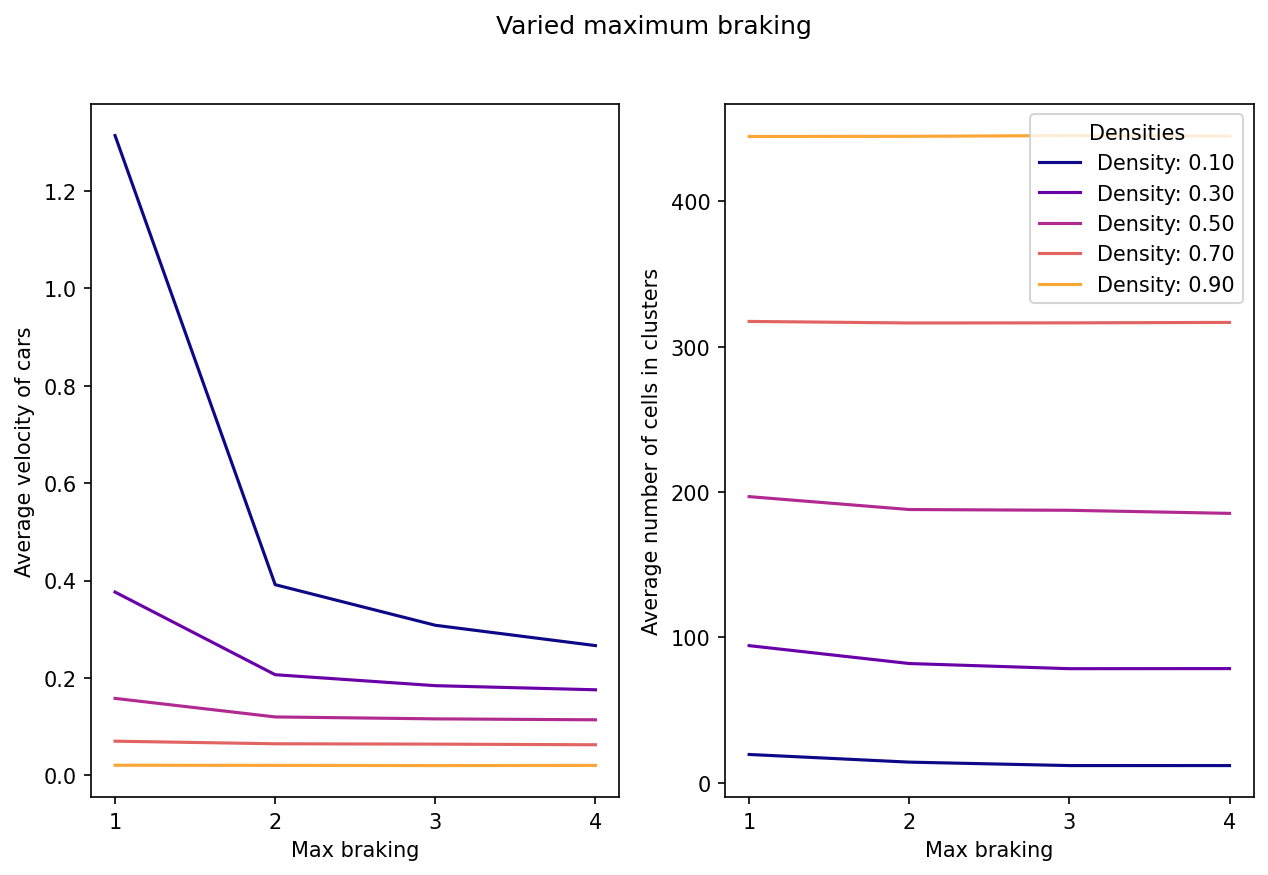

In [72]:
maximum_braking = np.arange(1, 5, 1)
densities = np.linspace(0.1, 0.9, 5)

velocity_averages = []
average_cells_in_clusters_per_density = []

for b in maximum_braking:
    for density in densities:
        
        simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax, max_brake = b)
        simulation.run_model()
        
        # Velocity calculations
        velocity_average = simulation.average_velocity()
        velocity_averages.append(velocity_average)

        # Cells in clusters calculations
        cells_in_clusters_list = simulation.clusters()[0]
        cells_cluster_average = np.mean(cells_in_clusters_list) 
        average_cells_in_clusters_per_density.append(cells_cluster_average)


# Reshape velocity_averages to match the shape of max_acceleration and densities
velocity_averages = np.array(velocity_averages).reshape(len(maximum_braking), len(densities))
average_cells_in_clusters_per_density = np.array(average_cells_in_clusters_per_density).reshape(len(maximum_braking), len(densities))


#plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))

# For each density
for i in range(len(densities)):
    # Plotting the lines with gradients of colour
    colour = plt.cm.plasma(i / float(len(densities)))

    axs[0].plot(maximum_braking, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')
    axs[0].set_xticks(maximum_braking)
    axs[1].plot(maximum_braking, average_cells_in_clusters_per_density[:, i], color=colour, label=f'Density: {densities[i]:.2f}')
    axs[1].set_xticks(maximum_braking)

axs[0].set_xlabel('Max braking')
axs[0].set_ylabel('Average velocity of cars')
axs[1].set_xlabel('Max braking')
axs[1].set_ylabel('Average number of cells in clusters')
plt.suptitle('Varied maximum braking')
plt.legend(title='Densities')
plt.show()


In the left graph we see that as sharp braking increases, the average velocity of cars decreases (at least for lower densities).

However, in the right graph we see that the sharp braking doesn't have an effect on the average number of cars stuck in traffic.

This can be seen in the CA plots above. When sharp braking increases, the traffic patterns become more chaotic. We get the same number of cells in clusters, but more chaoticly distributed which might lead to cars needing to stop and go more often and therefore lower average velocities.